In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from matplotlib.ticker import FuncFormatter

In [2]:
FilePath = "addresses.csv"

In [3]:
dataframe = pd.read_csv(FilePath)

In [4]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   company_id   100000 non-null  int64 
 1   address      99032 non-null   object
 2   total_spend  100000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.3+ MB
None


In [5]:
print(dataframe.head())

   company_id                                            address  total_spend
0           1  APARTMENT 2,\n52 BEDFORD ROAD,\nLONDON,\nENGLA...         5700
1           2           107 SHERINGHAM AVENUE,\nLONDON,\nN14 4UJ         4700
2           3  43 SUNNINGDALE,\nYATE,\nBRISTOL,\nENGLAND,\nBS...         5900
3           4  HAWESWATER HOUSE,\nLINGLEY MERE BUSINESS PARK,...         7200
4           5  AMBERFIELD BARN HOUSE AMBER LANE,\nCHART SUTTO...         4600


In [6]:
print(dataframe.describe())

          company_id    total_spend
count  100000.000000  100000.000000
mean    50000.500000    4951.662000
std     28867.657797    1500.983866
min         1.000000       0.000000
25%     25000.750000    3900.000000
50%     50000.500000    5000.000000
75%     75000.250000    6000.000000
max    100000.000000   11700.000000


In [7]:
print(dataframe.isnull().sum())

company_id       0
address        968
total_spend      0
dtype: int64


In [8]:
dataframe = dataframe.dropna()

In [9]:
print(dataframe.isnull().sum())

company_id     0
address        0
total_spend    0
dtype: int64


In [10]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99032 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   company_id   99032 non-null  int64 
 1   address      99032 non-null  object
 2   total_spend  99032 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.0+ MB
None


In [11]:
print(dataframe.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 99032, dtype: bool


In [12]:
dataframe = dataframe.drop_duplicates()

In [13]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99032 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   company_id   99032 non-null  int64 
 1   address      99032 non-null  object
 2   total_spend  99032 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.0+ MB
None


In [14]:
print(dataframe['total_spend'].describe())

count    99032.000000
mean      4951.673197
std       1500.642398
min          0.000000
25%       3900.000000
50%       5000.000000
75%       6000.000000
max      11700.000000
Name: total_spend, dtype: float64


In [15]:
for address in dataframe['address'].head():
    print(address,"\n")

APARTMENT 2,
52 BEDFORD ROAD,
LONDON,
ENGLAND,
SW4 7HJ 

107 SHERINGHAM AVENUE,
LONDON,
N14 4UJ 

43 SUNNINGDALE,
YATE,
BRISTOL,
ENGLAND,
BS37 4HZ 

HAWESWATER HOUSE,
LINGLEY MERE BUSINESS PARK,
LINGLEY GREEN AVENUE,
GREAT SANKEY, WARRINGTON,
WA5 3LP 

AMBERFIELD BARN HOUSE AMBER LANE,
CHART SUTTON,
MAIDSTONE,
ENGLAND,
ME17 3SF 



In [16]:
dataframe['new_address'] = dataframe["address"].str.upper()

In [17]:
print(dataframe['new_address'].head())

0    APARTMENT 2,\n52 BEDFORD ROAD,\nLONDON,\nENGLA...
1             107 SHERINGHAM AVENUE,\nLONDON,\nN14 4UJ
2    43 SUNNINGDALE,\nYATE,\nBRISTOL,\nENGLAND,\nBS...
3    HAWESWATER HOUSE,\nLINGLEY MERE BUSINESS PARK,...
4    AMBERFIELD BARN HOUSE AMBER LANE,\nCHART SUTTO...
Name: new_address, dtype: object


In [18]:
print(len(dataframe[dataframe['new_address'].str.contains("LONDON,")]))
print(len(dataframe[dataframe['new_address'].str.contains("LONDON")]))

20831
21768


In [19]:
cities = pd.read_csv("cities.csv", header = None, names=["city"])

In [20]:
print(cities.head())
print(len(cities))

              city
0          England
1             Bath
2      Birmingham*
3        Bradford*
4  Brighton & Hove
80


In [21]:
countries_to_remove = ["England", "Scotland", "Wales", "Northern Ireland"]
cities_to_remove = cities[cities["city"].isin(countries_to_remove)].index
cities = cities.drop(index=cities_to_remove)
print(len(cities))

76


In [22]:
print(cities.describe())

          city
count       76
unique      75
top     Bangor
freq         2


In [23]:
print(cities.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 1 to 79
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   city    76 non-null     object
dtypes: object(1)
memory usage: 1.2+ KB
None


In [24]:
cities["city"] = cities["city"].str.replace("*", "", regex=False)

In [25]:
cities["city"] = cities["city"].str.upper()

In [26]:
print(cities.head())
print(len(cities))

              city
1             BATH
2       BIRMINGHAM
3         BRADFORD
4  BRIGHTON & HOVE
5          BRISTOL
76


In [27]:
for city in cities["city"].values:
    dataframe.loc[dataframe["new_address"].str.contains(f"\n{city},"),"city"]=city

In [28]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99032 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   company_id   99032 non-null  int64 
 1   address      99032 non-null  object
 2   total_spend  99032 non-null  int64 
 3   new_address  99032 non-null  object
 4   city         44574 non-null  object
dtypes: int64(2), object(3)
memory usage: 4.5+ MB
None


In [29]:
print(dataframe.head())

   company_id                                            address  total_spend  \
0           1  APARTMENT 2,\n52 BEDFORD ROAD,\nLONDON,\nENGLA...         5700   
1           2           107 SHERINGHAM AVENUE,\nLONDON,\nN14 4UJ         4700   
2           3  43 SUNNINGDALE,\nYATE,\nBRISTOL,\nENGLAND,\nBS...         5900   
3           4  HAWESWATER HOUSE,\nLINGLEY MERE BUSINESS PARK,...         7200   
4           5  AMBERFIELD BARN HOUSE AMBER LANE,\nCHART SUTTO...         4600   

                                         new_address     city  
0  APARTMENT 2,\n52 BEDFORD ROAD,\nLONDON,\nENGLA...   LONDON  
1           107 SHERINGHAM AVENUE,\nLONDON,\nN14 4UJ   LONDON  
2  43 SUNNINGDALE,\nYATE,\nBRISTOL,\nENGLAND,\nBS...  BRISTOL  
3  HAWESWATER HOUSE,\nLINGLEY MERE BUSINESS PARK,...      NaN  
4  AMBERFIELD BARN HOUSE AMBER LANE,\nCHART SUTTO...      NaN  


In [30]:
dataframe["city"].fillna("OTHER", inplace = True)

In [31]:
print(dataframe.head())

   company_id                                            address  total_spend  \
0           1  APARTMENT 2,\n52 BEDFORD ROAD,\nLONDON,\nENGLA...         5700   
1           2           107 SHERINGHAM AVENUE,\nLONDON,\nN14 4UJ         4700   
2           3  43 SUNNINGDALE,\nYATE,\nBRISTOL,\nENGLAND,\nBS...         5900   
3           4  HAWESWATER HOUSE,\nLINGLEY MERE BUSINESS PARK,...         7200   
4           5  AMBERFIELD BARN HOUSE AMBER LANE,\nCHART SUTTO...         4600   

                                         new_address     city  
0  APARTMENT 2,\n52 BEDFORD ROAD,\nLONDON,\nENGLA...   LONDON  
1           107 SHERINGHAM AVENUE,\nLONDON,\nN14 4UJ   LONDON  
2  43 SUNNINGDALE,\nYATE,\nBRISTOL,\nENGLAND,\nBS...  BRISTOL  
3  HAWESWATER HOUSE,\nLINGLEY MERE BUSINESS PARK,...    OTHER  
4  AMBERFIELD BARN HOUSE AMBER LANE,\nCHART SUTTO...    OTHER  


In [32]:
dataframe["city"].value_counts().head()

OTHER         54458
LONDON        20762
MANCHESTER     1902
BIRMINGHAM     1866
GLASGOW        1273
Name: city, dtype: int64

In [33]:
dataframe["city"].value_counts().head(20)

OTHER            54458
LONDON           20762
MANCHESTER        1902
BIRMINGHAM        1866
GLASGOW           1273
BRISTOL           1150
LEEDS             1040
EDINBURGH         1038
LEICESTER          905
NOTTINGHAM         838
LIVERPOOL          838
CARDIFF            797
SHEFFIELD          706
COVENTRY           553
MILTON KEYNES      493
SOUTHAMPTON        477
NORWICH            449
BRADFORD           417
BELFAST            416
PRESTON            406
Name: city, dtype: int64

# the top 20 cities based on customers

In [34]:
Not_Included_Cities = set(cities["city"]) - set(dataframe["city"])  
print(Not_Included_Cities)

{'KINGSTON-UPON-HULL'}


In [35]:
dataframe.loc[dataframe["new_address"].str.contains("\nHULL")]

,company_id,address,total_spend,new_address,city
455,456,"349 BEVERLEY ROAD,\nANLABY,\nHULL,\nENGLAND,\n...",3800,"349 BEVERLEY ROAD,\nANLABY,\nHULL,\nENGLAND,\n...",OTHER
1139,1140,"90 CALVERT LANE,\nHULL,\nENGLAND,\nHU4 6BJ",6000,"90 CALVERT LANE,\nHULL,\nENGLAND,\nHU4 6BJ",OTHER
1822,1823,"ACER GLADE BLACK TUP LANE,\nARNOLD,\nHULL,\nEN...",4600,"ACER GLADE BLACK TUP LANE,\nARNOLD,\nHULL,\nEN...",OTHER
1831,1832,"10 GORDON STREET,\nHULL,\nENGLAND,\nHU3 3HN",5300,"10 GORDON STREET,\nHULL,\nENGLAND,\nHU3 3HN",OTHER
1921,1922,"70 WRIGHT STREET,\nHULL,\nENGLAND,\nHU2 8JD",6100,"70 WRIGHT STREET,\nHULL,\nENGLAND,\nHU2 8JD",OTHER
...,...,...,...,...,...
98479,98480,"31-38 QUEEN STREET,\nHULL,\nENGLAND,\nHU1 1UU",4500,"31-38 QUEEN STREET,\nHULL,\nENGLAND,\nHU1 1UU",OTHER
98886,98887,"13 SALMON GROVE,\nHULL,\nEAST YORKSHIRE,\nENGL...",5000,"13 SALMON GROVE,\nHULL,\nEAST YORKSHIRE,\nENGL...",OTHER
99196,99197,"22 19TH AVENUE,\nHULL,\nENGLAND,\nHU6 8HF",5900,"22 19TH AVENUE,\nHULL,\nENGLAND,\nHU6 8HF",OTHER
99434,99435,"F14 THE BLOC SPRINGFIELD WAY,\nANLABY,\nHULL,\...",3100,"F14 THE BLOC SPRINGFIELD WAY,\nANLABY,\nHULL,\...",OTHER


In [36]:
dataframe.loc[dataframe["new_address"].str.contains("\nHULL"),"city"]="HULL"

In [37]:
dataframe["city"].value_counts().head(20)

OTHER            54164
LONDON           20762
MANCHESTER        1902
BIRMINGHAM        1866
GLASGOW           1273
BRISTOL           1150
LEEDS             1040
EDINBURGH         1038
LEICESTER          905
NOTTINGHAM         838
LIVERPOOL          838
CARDIFF            797
SHEFFIELD          706
COVENTRY           553
MILTON KEYNES      493
SOUTHAMPTON        477
NORWICH            449
BRADFORD           417
BELFAST            416
PRESTON            405
Name: city, dtype: int64

In [38]:
Top_20_Cities = dataframe.groupby("city")["total_spend"].sum().sort_values(ascending=False).head(20).sort_values(ascending=False) 

In [39]:
Top_20_Cities

city
OTHER            267806500
LONDON           103042800
MANCHESTER         9344200
BIRMINGHAM         9317900
GLASGOW            6293100
BRISTOL            5730400
LEEDS              5167100
EDINBURGH          5089600
LEICESTER          4431700
NOTTINGHAM         4200200
LIVERPOOL          4155300
CARDIFF            3972600
SHEFFIELD          3500900
COVENTRY           2679000
MILTON KEYNES      2484200
SOUTHAMPTON        2376600
NORWICH            2259000
BRADFORD           2060700
BELFAST            2059400
PRESTON            2044900
Name: total_spend, dtype: int64

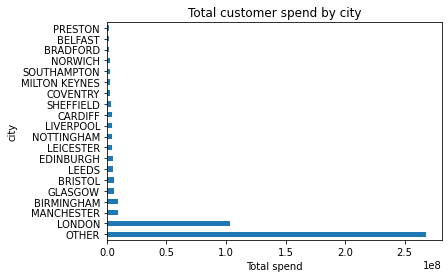

In [40]:
Top_20_Cities.plot.barh()
plt.title("Total customer spend by city")
plt.xlabel("Total spend")
plt.show()

In [41]:
Last_20_Cities = dataframe.groupby("city")["total_spend"].sum().sort_values(ascending=True).head(20).sort_values(ascending=True) 

In [42]:
Last_20_Cities

city
ST DAVIDS                6300
BRIGHTON & HOVE          7400
NEWCASTLE-UPON-TYNE     10900
ST ASAPH                34900
WESTMINSTER             50000
RIPON                  120100
WELLS                  255700
ARMAGH                 263400
LISBURN                292000
BANGOR                 292000
STOKE ON TRENT         302600
DUNFERMLINE            317100
LANCASTER              324700
STIRLING               325600
INVERNESS              342200
PERTH                  349500
ELY                    354000
LONDONDERRY            383700
LICHFIELD              419000
TRURO                  419300
Name: total_spend, dtype: int64

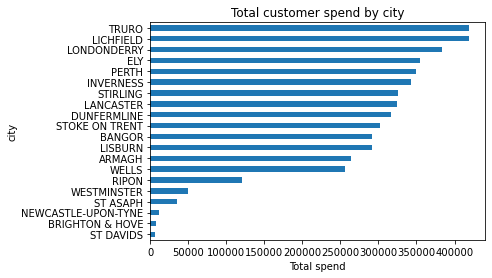

In [43]:
Last_20_Cities.plot.barh()
plt.title("Total customer spend by city")
plt.xlabel("Total spend")
plt.show()

In [52]:
print("Total spend customers inside London:")
print(dataframe.loc[dataframe["city"] == "LONDON", "total_spend"].sum())

Total spend customers inside London:
103042800


In [53]:
print("Total spend for All customers Outside London:")
print(dataframe.loc[dataframe["city"] != "LONDON", "total_spend"].sum())

Total spend for All customers Outside London:
387331300


In [54]:
print("Total spend for All customers not found in London and OTHER:")
print(dataframe.loc[(dataframe["city"].isin(["LONDON", "OTHER"])) == False, "total_spend"].sum())

Total spend for All customers not found in London and OTHER:
119524800
